In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_json('../data/database.json')

In [6]:
import calendar
import datetime

# Erstellt eine neue Zeile mit dem Wochentag
news['day_of_week'] = news['date'].dt.day_of_week
news['day_of_week_word'] = news['date'].dt.day_name(locale='de_de') 

news['hour'] = news['date'].dt.hour

news = news.groupby(["hour", "day_of_week"]).size().reset_index(name="amount")

news['hour_formatted'] = news['hour'].add_suffix(' h')

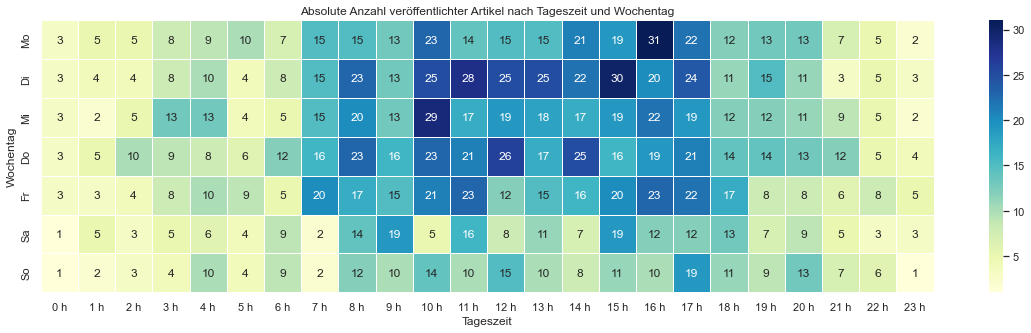

In [7]:
from importlib.resources import path
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(20,5)})

newsPivot = news.pivot("day_of_week", "hour", "amount")

ax = sns.heatmap(newsPivot, linewidths=.5, annot=True, fmt="d", cmap="YlGnBu")

ax.set_title('Absolute Anzahl veröffentlichter Artikel nach Tageszeit und Wochentag')
ax.set_xlabel('Tageszeit')
ax.set_ylabel('Wochentag')
ax.set_yticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
ax.set_xticklabels((str(item) + ' h') for item in list(range(0, 24)))

plt.show()